In [4]:
#import needed libraries
import pandas as pd
import numpy as np

In [5]:
#Read in data
features = pd.read_csv('temps.csv')
features.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


In [6]:
print('shape of our features is: {}'.format(features.shape))

shape of our features is: (348, 9)


In [7]:
#Descriptive statistics for each column
features.describe()

,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.511494,62.560345,59.760632,62.543103,60.034483
std,0.0,3.498380,8.772982,11.813019,11.767406,10.527306,11.794146,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000
max,2016.0,12.000000,31.000000,92.000000,92.000000,77.400000,92.000000,95.000000


In [8]:
#Use dateline for dealing with dates
import datetime

#get years, months, and days
years = features['year']
months = features['month']
days = features['day']



dates = [str(int(year)) + '-'+ str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

In [9]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

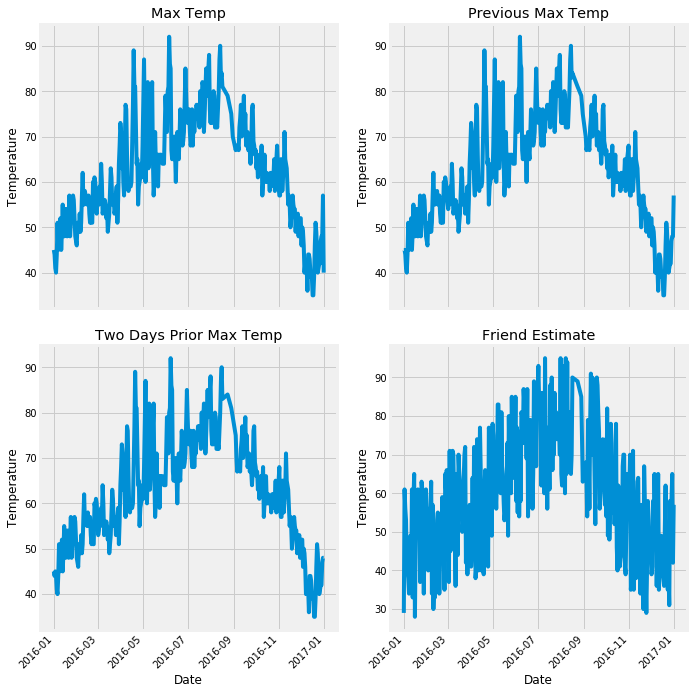

In [10]:
# Set up the plotting layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
fig.autofmt_xdate(rotation = 45)

# Actual max temperature measurement
ax1.plot(dates, features['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature'); ax1.set_title('Max Temp')

# Temperature from 1 day ago
ax2.plot(dates, features['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature'); ax2.set_title('Previous Max Temp')

# Temperature from 2 days ago
ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature'); ax3.set_title('Two Days Prior Max Temp')

# Friend Estimate
ax4.plot(dates, features['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature'); ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)

In [11]:
#One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)

#display the first 5 rows of the last 12 columns
features.head(5)

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [12]:
features.shape

(348, 15)

In [13]:
#Features and Targets and convert Data to Arrays

#Labels are the values we want to predict
labels = np.array(features['actual'])

#Remove the labels from the features
#Axis 1 refers to the columns
features = features.drop('actual', axis = 1)

#Saving feature names for later use
feature_list = list(features.columns)

#Convert to numpy array
features = np.array(features)

In [14]:
print(feature_list)

['year', 'month', 'day', 'temp_2', 'temp_1', 'average', 'friend', 'week_Fri', 'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs', 'week_Tues', 'week_Wed']


In [15]:
#Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

#Splits the data into training and testing sets
#Setting the random state to 42 which means the results will be the same each time I run the split for reproducible results.

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [16]:
#Checking the shapes the shapes of all data

print('Training---->Features Shape: {}  Labels Shape: {}'.format(train_features.shape,train_labels.shape))
print('Testing----->Features Shape: {}  Labels Shape: {}'.format(test_features.shape,test_labels.shape))

Training---->Features Shape: (261, 14)  Labels Shape: (261,)
Testing----->Features Shape: (87, 14)  Labels Shape: (87,)


In [17]:
#Establish a baseline which are the historical averages
baseline_preds = test_features[:,feature_list.index('average')]

#Baseline errors and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)

print('Average baseline error: ',round(np.mean(baseline_errors),2))

Average baseline error:  5.06


In [18]:
#Train Model

from sklearn.ensemble import RandomForestRegressor

#Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

#Train the model on training data
rf.fit(train_features, train_labels);

In [19]:
#Making Predication
predictions = rf.predict(test_features)

#Calculate absolute errors
errors = abs(predictions - test_labels)

#Print out the mean absolute error
print('Mean Absolute Error: ',round(np.mean(errors),2),'degrees.')

Mean Absolute Error:  3.83 degrees.


In [20]:
from sklearn.metrics import accuracy_score

type(predictions)
type(test_labels)
#accuracy_score(test_labels,predictions)

numpy.ndarray

In [23]:
#Performance Metrics
#Calculate mean absolute percentage error
mape = (errors/test_labels)*100

#accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy: ',round(accuracy,2))

Accuracy:  93.99
